This notebook tests the correctness of APD using a read sensor (accelerometer) data.

In [52]:
from DQM import DQM_single_file
import pandas as pd
from load_data import load_data_json_single_file
from pipeline_functions.preprocessing import *
import matplotlib.pyplot as plt

Import the read data, then compute the DQM for it.

In [53]:
df = load_data_json_single_file('/home/lin/Documents/CAMH/QA-module/data/sensor/json/SUBJ00001_Accelerometer_REC000004.json')
print(df)

                timestamp         x         y         z
0     1593961343290000000 -1.484405  8.662222 -4.252102
1     1593961343495000000 -1.345541  8.561666 -4.793192
2     1593961343708000000 -2.006341  8.595184 -4.841076
3     1593961343912000000 -1.855506  8.528147 -4.848259
4     1593961344114000000 -0.919373  8.396465 -4.754885
...                   ...       ...       ...       ...
5237  1593962661392000000  0.883460  5.846641  7.740454
5238  1593962661598000000  0.905008  5.786786  7.757214
5239  1593962661804000000  0.859518  5.870583  7.539341
5240  1593962662009000000  0.864307  5.930438  7.671022
5241  1593962662217000000  0.890643  5.872977  7.893683

[5242 rows x 4 columns]


In [54]:
testing_APD_DQM = DQM_single_file()
testing_APD_DQM.set_input_data(df)
testing_APD_DQM.compute_DQM()

Start computing the DQM... This may take a long time if the dataset is large
The total time for computing the DQM is: 2.9254097938537598 seconds.


First we get the APD score of the record

In [55]:
testing_APD_DQM.get_APD()

'0.002098435711560473'

Now we get the index of the anomaly points.

In [56]:
testing_APD_DQM.get_anomaly_index()

[649, 675, 1308, 1352, 1431, 1491, 1577, 1704, 2230, 3378, 3648]

The computed APD score should be the lenth of categorized anomaly points divided by the length of the record.

In [57]:
len(testing_APD_DQM.get_anomaly_index())/(df.shape[0])

0.002098435711560473

Now we justified the correctness of APD score computation, then we show that the computed data points are actually anomaly points.

First we preprocess the raw data into one-dimension for the visulization. Note that the univariate_value is computed by the multi_var_to_uni function in pipeline_functions/preprocessing.py. Mathemeticallly, it is computed by take the square root of the sum of the square of each column element, i.e.: uni = sqrt(sum((each column)**2)).

In [58]:
feature_names = list(df.keys())
feature_names.remove(feature_names[0])
record = features_to_float(df, feature_names)
record = multi_var_to_uni(record, feature_names)
print(record['univariate_value'])

0        9.763090
1        9.903903
2       10.066708
3        9.983877
4        9.693028
          ...    
5237     9.740551
5238     9.720097
5239     9.593966
5240     9.734562
5241     9.879035
Name: univariate_value, Length: 5242, dtype: float64


Now we visulize the record with the anomaly points highlighted.

[9.870145978173145, 9.845846129293028, 9.84549933849222, 9.86652640641691, 9.792320444556013, 9.854981593826759, 9.972112683726662, 10.03254799298994, 9.826180074642311, 9.88412920873432, 9.802796962557492]


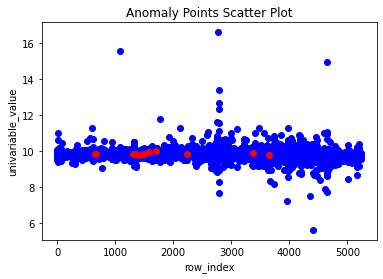

In [59]:
index = [range(record['univariate_value'].shape[0])]
plt.scatter(index, record['univariate_value'], color='blue')
plt.xlabel('row_index')
plt.ylabel('univariable_value')
plt.title('Anomaly Points Scatter Plot')
anomaly_index = testing_APD_DQM.get_anomaly_index()
anomaly_value = []
for i in anomaly_index:
    anomaly_value.append(record['univariate_value'].iloc[i])
plt.scatter(anomaly_index, anomaly_value, color='red')
plt.show()